<img style="float: left;" src="../images/logo.png" width="400"/><img style="float: right;" src="../images/icons.png" width="400"/>

# Global ECMWF Fire Forecasting

## Harmonized danger classes

According to EFFIS [documentation and user guidelines](../doc/EFFIS_Fire_In_CDS.pdf):

- In most European countries, the core of the wildfire season starts on 1st of March and ends on 31st of October.
- The EFFIS network adopts the Canadian Forest Fire Weather Index (FWI) System as the method to assess the fire danger level in a harmonized way throughout Europe.
  
**European** Fire Danger Classes (FWI ranges, upper bound excluded):
  - Very low = 0 - 5.2
  - Low = 5.2 - 11.2 
  - Moderate = 11.2 - 21.3 
  - High = 21.3 - 38.0 
  - Very high = 38.0 - 50.0 
  - Extreme > 50.0

In ECMWF experience, the above thresholds are particularly suited to assess fire danger in southern Europe, e.g. in the Mediterranean Region. Some countries, tend to calibrate these thresholds depending on local vegetation characteristics and fire regimes. This require local knowledge and/or experimentation.
For instance, **Portugal** uses the following thresholds for local-level assessments of fire danger: 
  - Reduced risk = 8.4,
  - Moderate risk = 17.2,
  - High risk = 24.6,
  - Maximum risk = 38.3

Northern European countries might be more inclined to test **Canadian** threshold levels for the purpose of local-level assessments of fire danger:
  - Very Low = 0 - 1,
  - Low = 2 - 4,
  - Moderate = 5 - 8,
  - High = 9 - 16,
  - VeryHigh = 17 - 30,
  - Extreme > 30
  
As another example, in **Indonesia** threshold levels are (probably due to high level of humidity):
  - Very Low = 0 - 3,
  - Low = 3 - 5,
  - Moderate = 5 - 10,
  - High = 10 - 17,
  - VeryHigh = 17 - 28,
  - Extreme > 28

In [1]:
# First of all, we need to import the necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import xarray as xr
import cartopy.crs as ccrs

# Enable inline displaying of plots
%matplotlib inline

## get frp data

In [2]:
bbox = [10.1, 24.8, 55, 69]
lon_slice = slice(10.1, 24.8)
lat_slice = slice(69, 55)


# Open fire radiative power dataset
ds = xr.open_dataset("../eodata/geff/global/frp/frp_20180701-31.nc")
# Data have global coverage and are bundled in monthly datacubes, we will need to slice in time and space
ds = ds.loc[
    dict(
        time=slice("2018-07-11", "2018-07-20"), longitude=lon_slice, latitude=lat_slice
    )
]

frpfire = ds.frpfire
frpfire.values[frpfire.values <= 0] = np.nan

x = []
y = []
for id in range(len(frpfire)):
    frpfire_ = frpfire.isel(time=id)
    idx = np.where(frpfire_>0)
    x.append(frpfire_.coords['longitude'][idx[1]]) # location of hot spot for the 15/07
    y.append(frpfire_.coords['latitude'][idx[0]])


## Classified forecasts

Raw FWI forecast values are expressed as a continuous rating in the range [0, +Inf[ (very rarely above 100). In order to aid decision makers raw forecasts are routinely converted into danger classes, based on the thresholds mentioned above, before being displayed by the EFFIS/GWIS viewer.

In this tutorial we are going to look at the predictive capability of the fire danger forecasts. Let us use the forecast issued on 14th July to see whether dangerous fire weather could have been predicted in the area where the Attica fires started burning on 23rd July (leadtime = 10 days).

In [3]:
# Open raw RT HRES forecast for Sweden, issued 10 days before the fires
ds = xr.open_dataset("../eodata/geff/201807Sweden/rt_hr/ECMWF_FWI_20180711_1200_hr_fwi_rt.nc")

map_proj = ccrs.LambertConformal(central_longitude=17.45, central_latitude=62)


C:\Users\paugam\AppData\Local\Temp\ipykernel_6624\1672375860.py:10: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for iax, ax in enumerate(p.axes.flat):


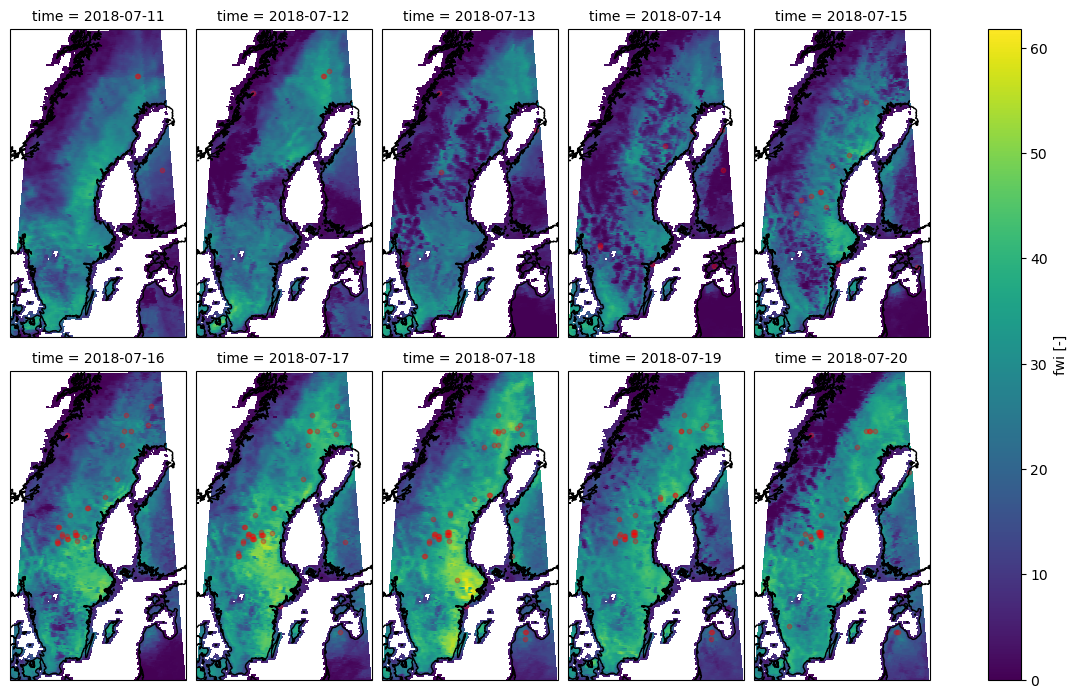

In [4]:
p = ds.fwi.plot(
    transform=ccrs.PlateCarree(),
    col="time",
    col_wrap=5,
    figsize=(12,7),
    subplot_kws={"projection": map_proj},
)


for iax, ax in enumerate(p.axes.flat):
    ax.scatter(x[iax], y[iax], transform=ccrs.PlateCarree(), color='r', s=10, alpha=.3)
    ax.coastlines()
    ax.set_extent(bbox)

C:\Users\paugam\AppData\Local\Temp\ipykernel_6624\848909211.py:14: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for iax, ax in enumerate(p.axes.flat):


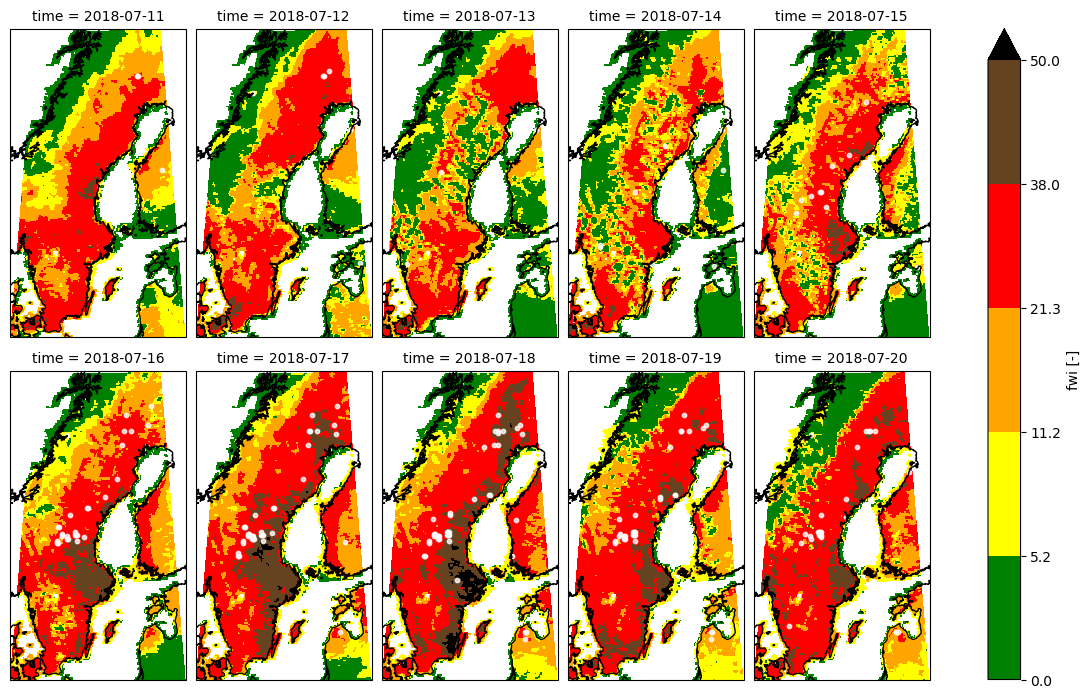

In [5]:
# Plot the re-classified forecast, Day 10

p = ds.fwi.plot(
    levels = [0.0, 5.2, 11.2, 21.3, 38.0, 50.0],
    colors = ["#008000", "#FFFF00", "#FFA500", "#FF0000", "#654321", "#000000"],
    label = ['Very low', 'Low', 'Moderate', 'High', 'Very high', 'Extreme'],
    transform=ccrs.PlateCarree(),
    col="time",
    col_wrap=5,
    figsize=(12,7),
    subplot_kws={"projection": map_proj},
)

for iax, ax in enumerate(p.axes.flat):
    ax.scatter(x[iax], y[iax], transform=ccrs.PlateCarree(), color='w', s=10, alpha=.8)
    ax.coastlines()
    ax.set_extent(bbox)


what do you think?
Try now with the candian threshild class.

# Application

Can you use the reanalysis data of Copernicus (see [here](https://cds.climate.copernicus.eu/cdsapp#!/dataset/cems-fire-historical?tab=overview)) to plot FWI for the day of the `el pont de vilomara` fire. Are the atmospheric conditions capable to explain  the strong fire activity?